# Example on how to use the python class

## Get list of files and labels

List files, which are named with 'Traj' in folder 'data'

In [25]:
files = !ls -lh <file_path>/*.mat

In [27]:
labels = [a.split('ory_')[-1].split('_2022')[0] for a in files]

In [28]:
labels

['BRU_SYD', 'LHR_JFK']

## Load class

In [29]:
from package import calculate_rf as rf

In [32]:
traj = rf.RadiativeForcing(files[0].split()[-1])

## Calculate radiative forcing and emissions for each trajectory-file

In [23]:
net_rf = []
net_emis = []

for file in files:
    trajectory = rf.RadiativeForcing(file.split()[-1])
    trajectory.drop_vertical_levels()
    
    net_rf.append(trajectory.total_rf())
    
    net_emis.append(trajectory.total_emis())

`calculate_rf(file.split()[-1])` creates a class instance with the trajectory data file.
`load_mat_as_dataframe()` extracts the relevant data from the file within `__init__()`.
`drop_vertical_levels()` limits the vertical emission to emission above the tropopause, which is the default. Other vertical limits can be given in hectopascal with e.g. `drop_vertical_levels(100)` to limit emissions to above 100 hPa.
`total_rf()` returns the stratospheric adjusted radiative forcing of the trajectory.
`total_emis()` returns the accumulated emissions for the chosen vertical levels.

## Output

In [24]:
trajectory.data.head(1)

,Latitude,Longitude,Altitude [km],tp_WMO [Pa],Altitude [Pa],H2O [kg],NO [kg],H2 [kg],H2O RF from H2O [mW m-2],O3 RF from H2O [mW m-2],O3 RF from H2 [mW m-2],O3 RF from NO [mW m-2]
179,51.302952,-2.827075,10.950761,23006.607422,22876.031608,1217.678955,0.467333,14.270504,0.000001,-0.0,-0.0,0.0


total_emis() returns three values with H$_2$O, H$_2$ and NO emission above the tropopause in tons in this order

In [15]:
net_emis

[[1095.47, 3.46, 8.65], [556.47, 4.09, 1.87]]

total_rf() returns one value with radiative forcing from water vapour changes due to water vapour emisson and ozone radiative forcing from H$_2$O, H$_2$ and NO emission in mWm-2

In [16]:
net_rf

[0.002277626952656135, 0.0008800361503643599]

## Visualisation

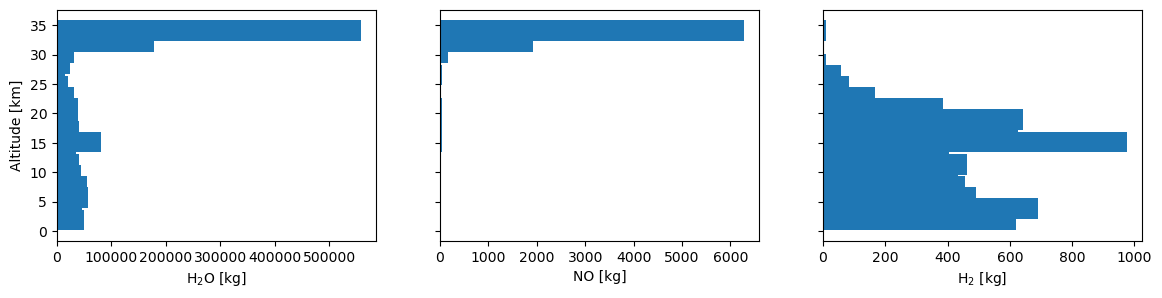

In [79]:
bins = np.linspace(0, 36, 20)
bin_idxs = np.digitize(traj.data['Altitude [km]'], bins)
data = traj.data.groupby(bin_idxs).sum()
data.index=bins[data.index]

fig, axs = plt.subplots(1,3, figsize=(14,3), sharey=True)

axs[0].barh(data.index,data['H2O [kg]'],height=3.5), axs[0].set_ylabel('Altitude [km]'), axs[0].set_xlabel('H$_2$O [kg]')
axs[1].barh(data.index,data['NO [kg]'],height=3.5), axs[1].set_xlabel('NO [kg]')
axs[2].barh(data.index,data['H2 [kg]'],height=3.5), axs[2].set_xlabel('H$_2$ [kg]')
    
plt.show()

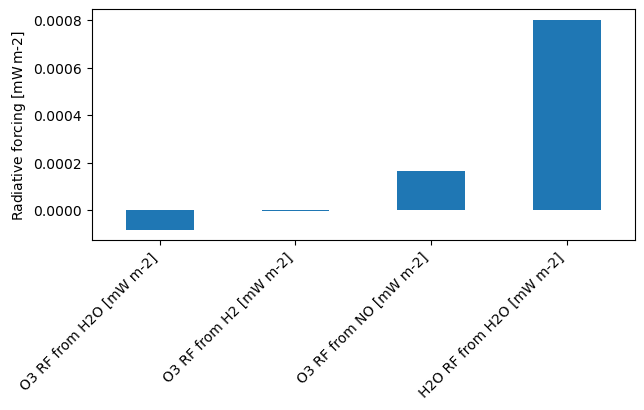

In [83]:
plt.figure(figsize=(7,3))

columns = ['O3 RF from H2O [mW m-2]','O3 RF from H2 [mW m-2]','O3 RF from NO [mW m-2]','H2O RF from H2O [mW m-2]']

data = trajectory.data[columns].sum()
data.plot.bar()

plt.ylabel('Radiative forcing [mW$\,$m-2]')
plt.xticks(rotation=45, ha="right")

plt.show()